<a href="https://colab.research.google.com/github/ramikadri/ramikadri/blob/main/Medical_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

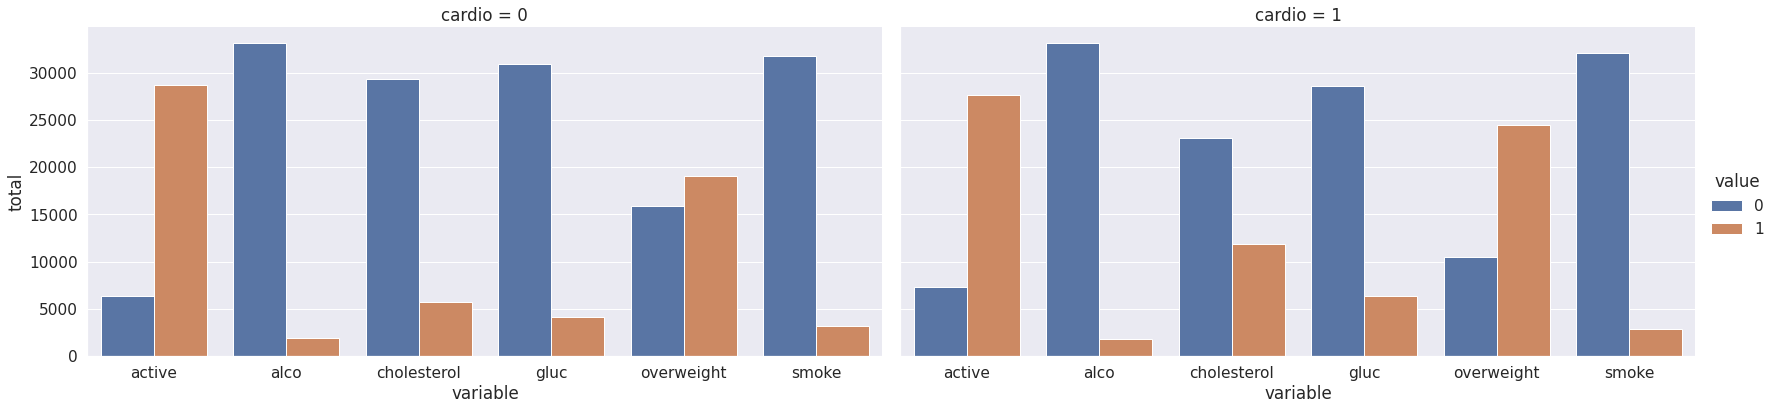

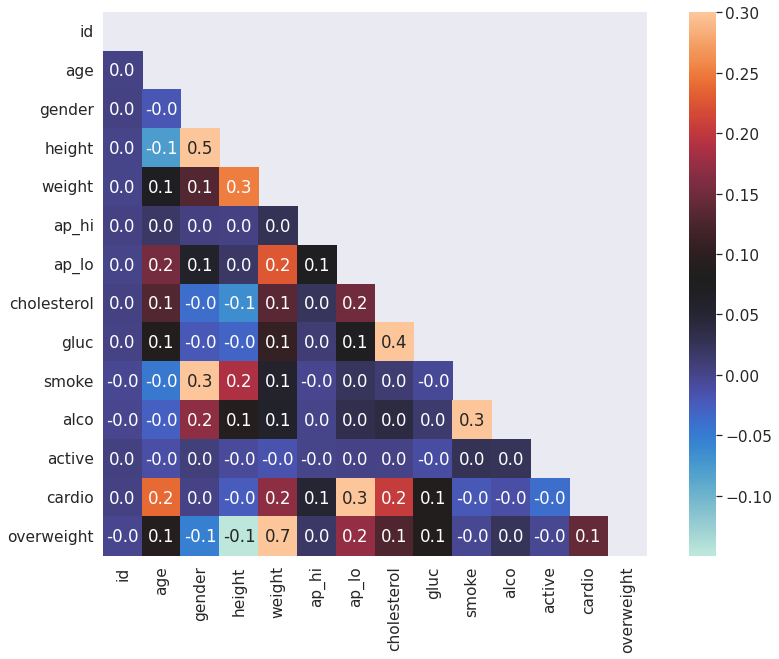

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = df['weight'] / ((df['height']/100) ** 2) 
df["overweight"]= df['overweight'] > 25
df['overweight']= df["overweight"].astype(int)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"]= df['cholesterol'] > 1
df["cholesterol"]= df['cholesterol'].astype(int)
df["gluc"]= df['gluc'] > 1
df["gluc"]= df['gluc'].astype(int)  

# Draw Categorical Plot



    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat =  df[['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']].melt()


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

df_cat = df[['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke','cardio']]
df_cat=df_cat.melt(id_vars='cardio')

    # Draw the catplot with 'sns.catplot()'



sea= sns.catplot(x="variable", hue="value", col="cardio",
                data=df_cat, kind="count",
                height=6, aspect=2).axes[0,0].set_ylabel('total')
fig= sea.figure


    

    
          


    # Do not modify the next two lines
fig.savefig('catplot.png')



# Draw Heat Map

    # Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
                           & (df['height'] >= (df['height'].quantile(0.025))) &
                           (df['height'] <= (df['height'].quantile(0.975))) &
                           (df['weight'] >= (df['weight'].quantile(0.025))) &
                           (df['weight'] <= (df['weight'].quantile(0.975)))]
corr = df_heat.corr()

mask = np.triu(corr)

fig, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.4)

sns.heatmap(
        corr,
        vmax=.30,
        center=0.08,
        annot=True,
        fmt='.1f',
        cbar=True,
        square=True,
        mask=mask)

    # Do not modify the next two lines
fig.savefig('heatmap.png')
    